#### Import of Libraries

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

Data Tinkering Functions

In [78]:
#df=df.drop(columns=["at1"])
#df=df.head(900)
#df = df[df != "?"]
#df=df.dropna(axis=0, how="any")
#df=df.astype(float)
#df.to_csv('datasets/blocks/page-blocks-e.csv', index=False)
def valueChange(columnLabel):
    for j in columnLabel:
        y = df[j]
        clas = y.unique()
        for i in range(len(clas)):
            df[j]=df[j].replace(clas[i],i)
        

#### Dataset

In [79]:
df = pd.read_csv('datasets/cleveland/cleveland.csv')
#valueChange(["LargestSpotSize","SpotDistribution"])


In [80]:
df.head(5)

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [81]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       297 non-null    float64
 1   Sex       297 non-null    float64
 2   Cp        297 non-null    float64
 3   Trestbps  297 non-null    float64
 4   Chol      297 non-null    float64
 5   Fbs       297 non-null    float64
 6   Restecg   297 non-null    float64
 7   Thalach   297 non-null    float64
 8   Exang     297 non-null    float64
 9   Oldpeak   297 non-null    float64
 10  Slope     297 non-null    float64
 11  Ca        297 non-null    float64
 12  Thal      297 non-null    float64
 13  Class     297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

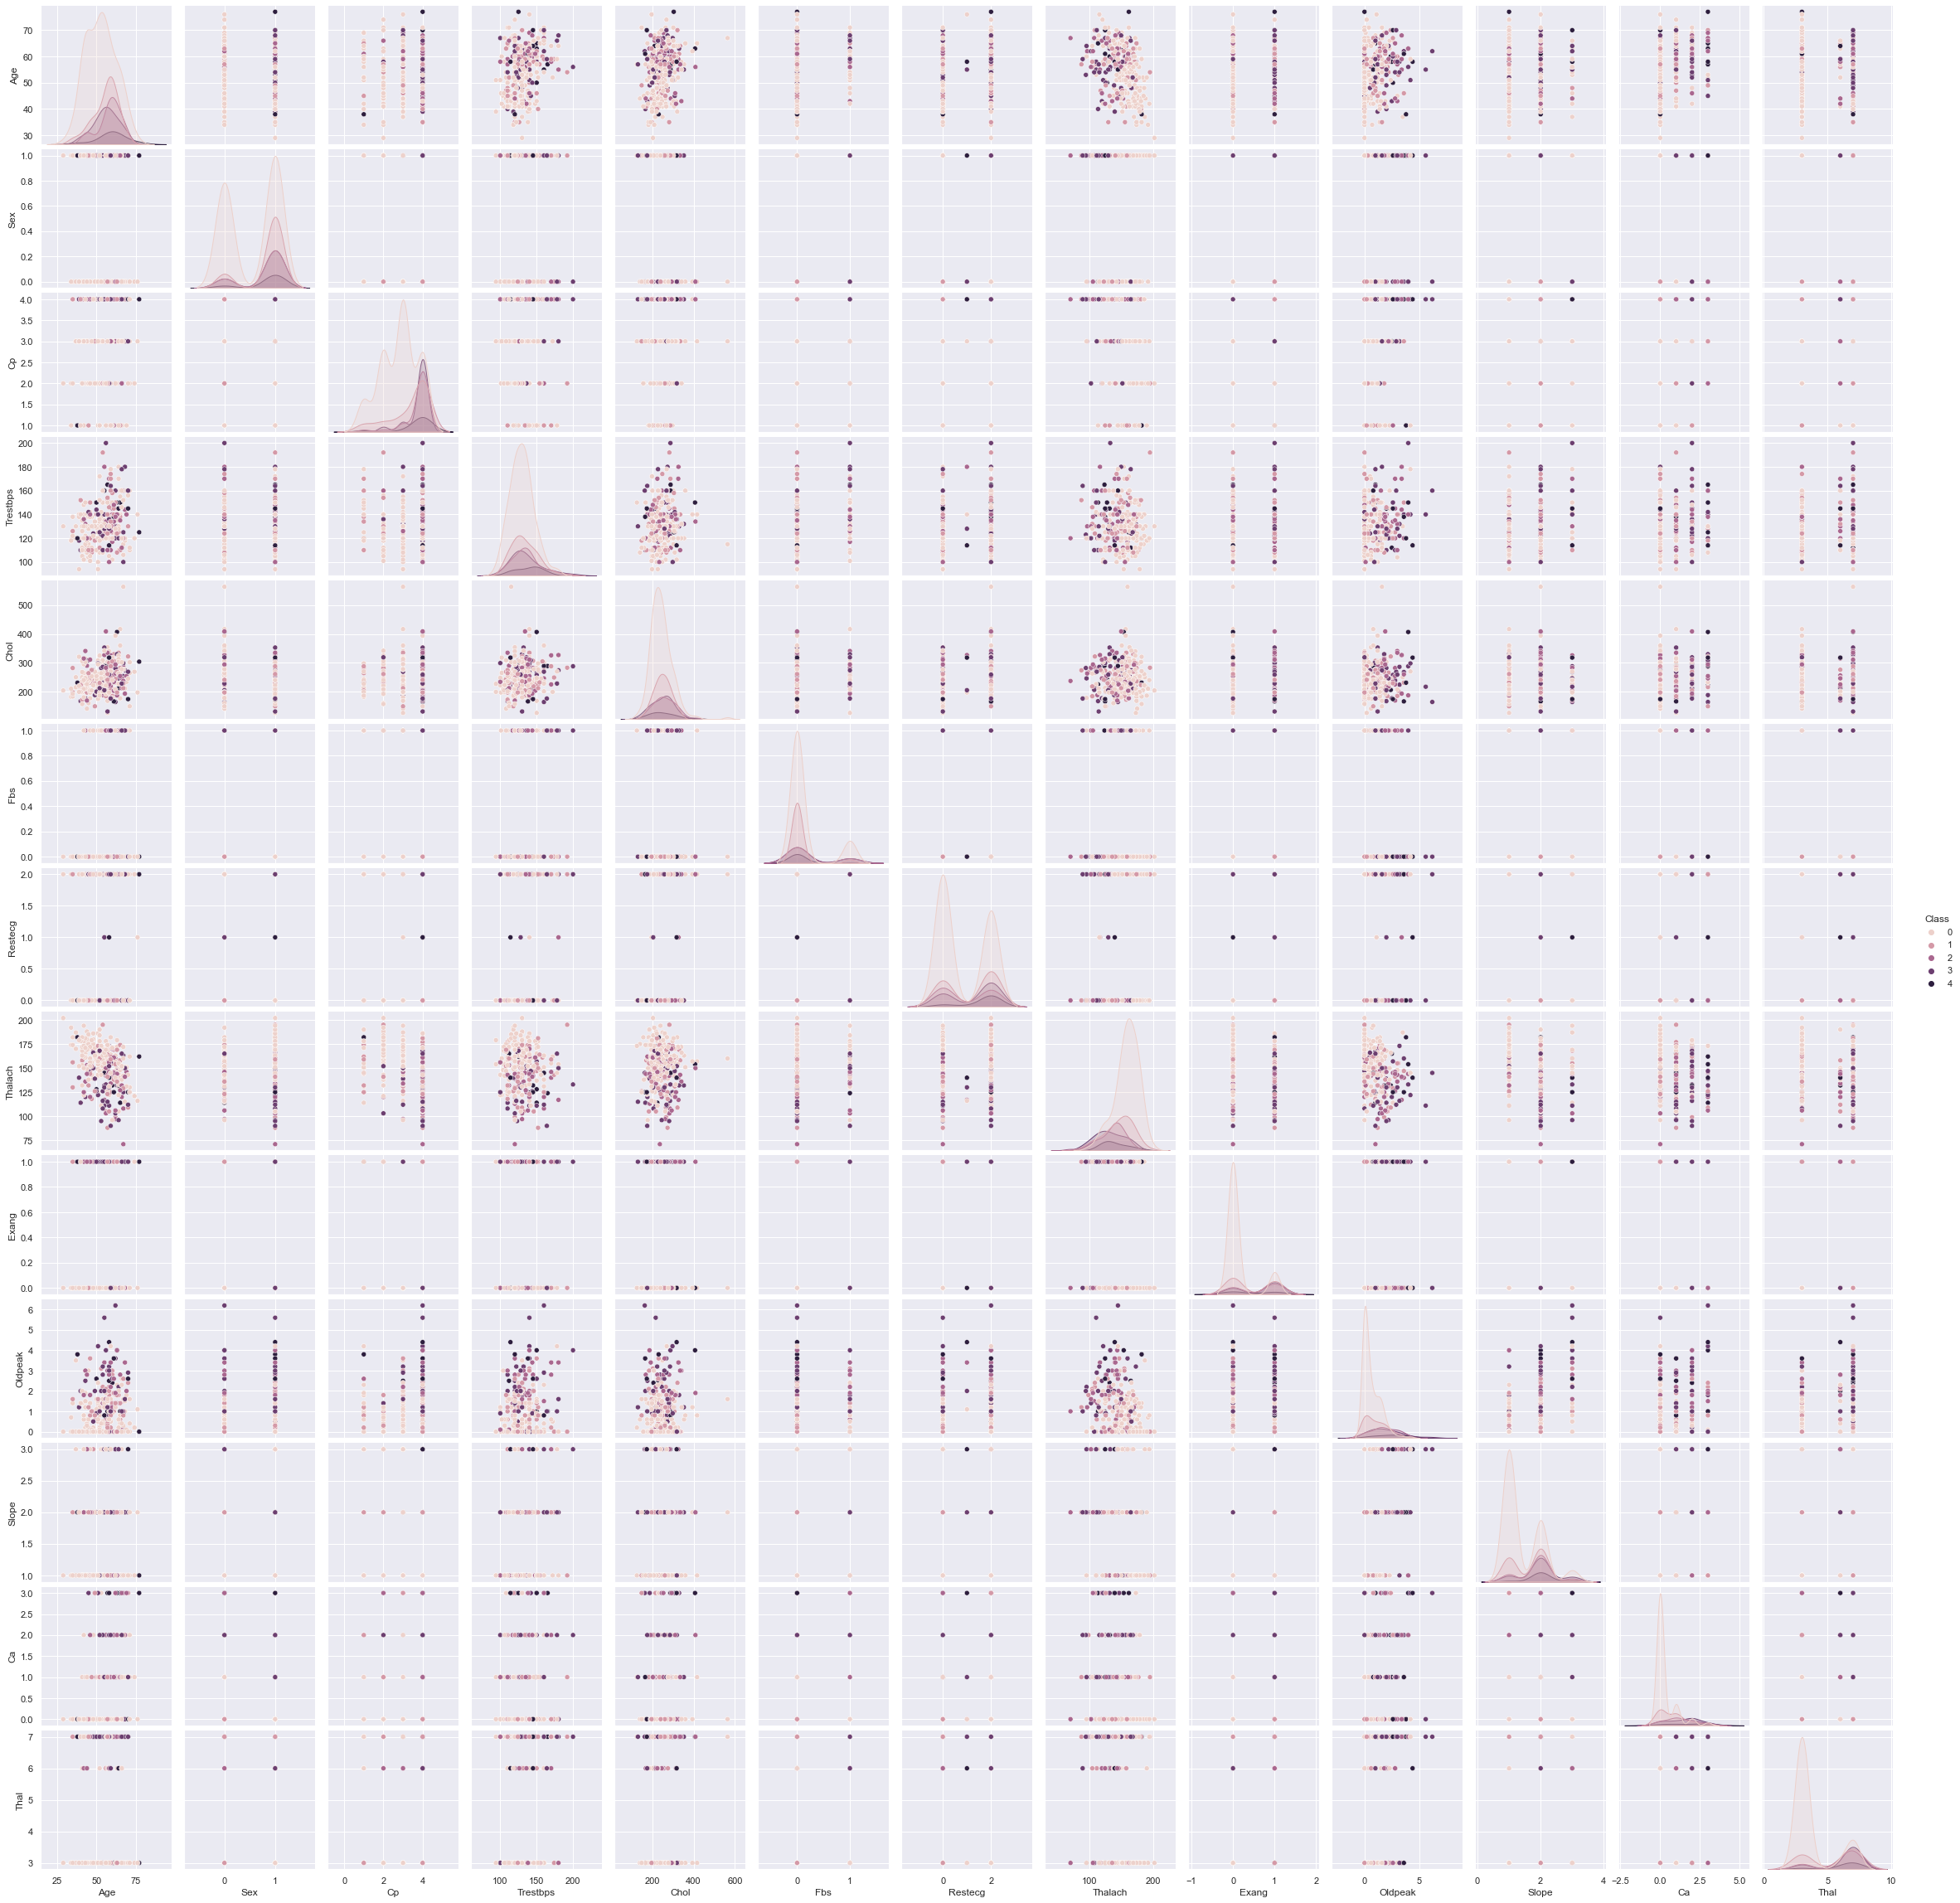

In [82]:
sns.pairplot(df, hue='Class')
plt.show()

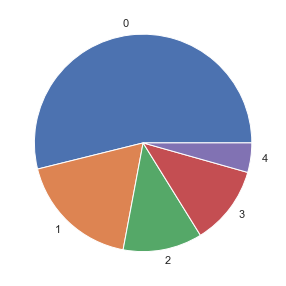

In [83]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [84]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
Sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
Cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
Trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
Chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
Fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
Restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
Thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
Exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
Oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


#### Standardize the Data

In [85]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,297.0,-1.256010e-16,1.001688,-2.827176,-0.724124,0.161372,0.714807,2.485798
Sex,297.0,-5.980999e-17,1.001688,-1.446980,-1.446980,0.691095,0.691095,0.691095
Cp,297.0,-2.840975e-17,1.001688,-2.240629,-0.164289,-0.164289,0.873880,0.873880
Trestbps,297.0,5.113755e-16,1.001688,-2.125634,-0.659431,-0.095506,0.468418,3.851964
Chol,297.0,-2.033540e-16,1.001688,-2.337704,-0.700254,-0.083802,0.551914,6.099981
Fbs,297.0,-4.784800e-17,1.001688,-0.411450,-0.411450,-0.411450,-0.411450,2.430427
Restecg,297.0,2.392400e-17,1.001688,-1.003419,-1.003419,0.003390,1.010199,1.010199
Thalach,297.0,4.904420e-16,1.001688,-3.431849,-0.724769,0.148482,0.716096,2.287949
Exang,297.0,-2.392400e-17,1.001688,-0.696419,-0.696419,-0.696419,1.435916,1.435916
Oldpeak,297.0,-1.196200e-17,1.001688,-0.906712,-0.906712,-0.219520,0.467672,4.419026


#### Observations and Variables

In [86]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

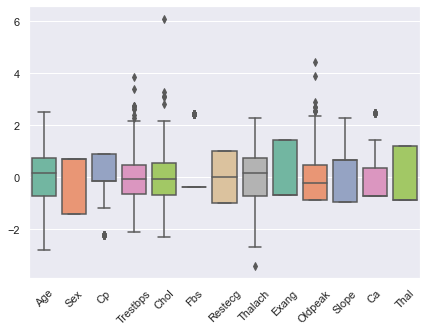

In [87]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

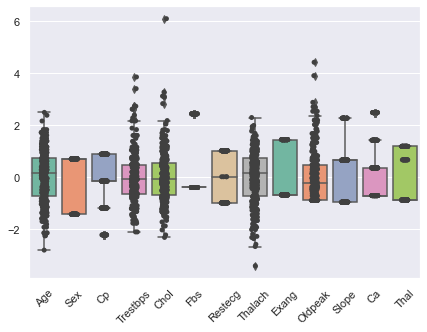

In [88]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

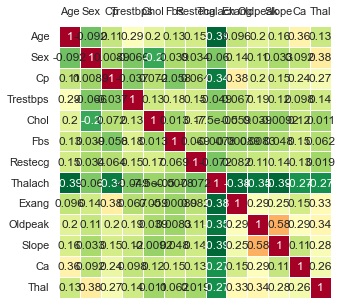

In [89]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [90]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [91]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,1.130664,1.087655,3.164263,2.293052,-0.023175,-0.578814,0.664854,0.536787,-1.495392,-0.499485,-0.337585,-0.479583
1,3.190926,1.417885,-0.533715,-0.857970,0.006289,-0.745347,-0.259063,-1.069777,0.342524,1.431509,1.145257,0.891418
2,-0.484339,-1.410972,0.397806,2.832741,-0.721309,0.388361,-0.522221,2.153525,0.760079,0.228379,1.545065,-0.342960
3,-2.284542,0.330033,-0.072260,1.209318,-0.770835,-0.625587,0.379567,-0.014736,1.050381,0.628110,-0.797211,0.322946
4,-2.204713,-0.345079,0.492229,0.013864,0.380238,-0.030775,-0.927745,-0.013141,-0.546530,0.474870,0.605536,-0.880945
...,...,...,...,...,...,...,...,...,...,...,...,...
292,-3.125275,-1.604048,0.708018,0.207657,0.009282,0.089526,-0.105913,0.098974,0.241600,0.659744,0.258663,0.673368
293,-1.175965,-0.532334,0.359812,1.627401,0.466737,-0.368925,-0.523884,0.470049,-1.209052,-0.224591,0.395991,-0.592764
294,0.064553,-0.269768,-1.983724,0.424005,1.501171,0.444928,1.273193,-1.039022,-0.188646,0.273803,-0.352537,-0.845081
295,2.652480,0.761084,2.087700,-0.472218,1.365018,-0.890218,1.594104,-0.944598,0.672730,-1.117387,0.353062,1.898596


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'12 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (23.6% expl.var)', ylabel='PC2 (12.3% expl.var)'>)

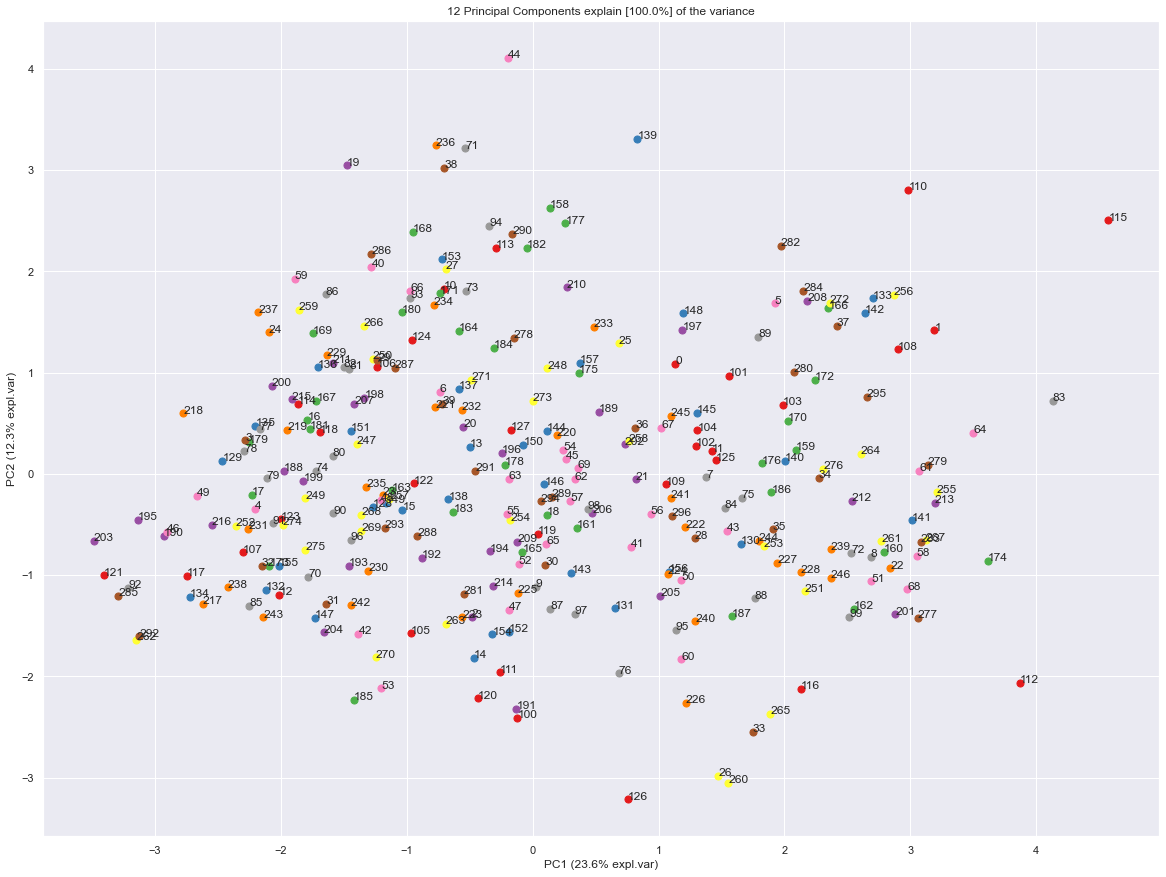

In [92]:
model.scatter(label=True, legend=False)

Eigenvectors

In [93]:
A = out['loadings'].T

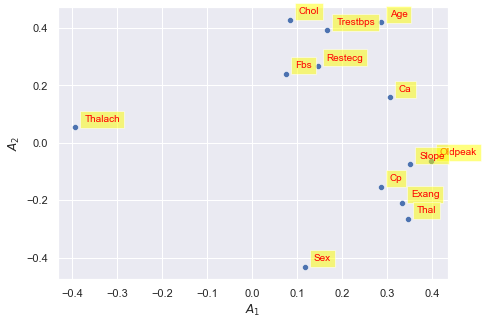

In [94]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

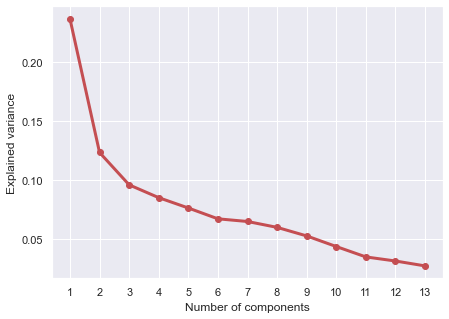

In [95]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

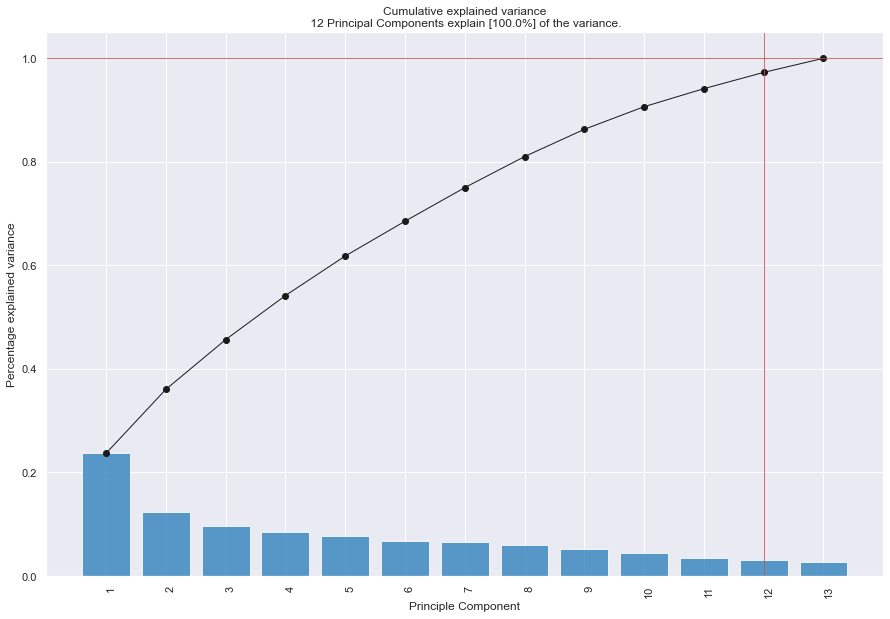

<Figure size 504x360 with 0 Axes>

In [96]:
model.plot();